# Análise do Comportamento de Compra de Consumidores de um web site

Este é um tipo de atividade comum realizado por Analistas de Dados e o resultado deste trabalho pode ser usado, por exemplo, para alimentar um modelo de Machine Learning e fazer previsões sobre comportamentos futuros.

No site, cada usuário efetua login usando sua conta pessoal e pode adquirir produtos à medida que navega pela lista de produtos oferecidos. Cada produto possui um valor de venda. Dados de idade e sexo de cada usuário foram coletados e estão fornecidos no arquivo JSON. 


1. Informações sobre os Consumidores 

* Número total de consumidores


2. Análise Geral de Compras

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total


3. Informações Demográficas Por Gênero

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados


4. Análise de Compras Por Gênero

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária


5. Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela):

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares


6. Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos


7. Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela):

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


8. Como considerações finais:

* Seu script deve funcionar para o conjunto de dados fornecido.
* Você deve usar a Biblioteca Pandas e o Jupyter Notebook.


In [1]:
#bibliotecas
import pandas as pd
import numpy as np


import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

# Aquisição de dados

In [2]:
#carregando os dados
file = "dados_compras.json"
purchase_file = pd.read_json(file, orient = "records")
purchase_file.head()

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


In [3]:
purchase_file.dtypes

Login            object
Idade             int64
Sexo             object
Item ID           int64
Nome do Item     object
Valor           float64
dtype: object

In [4]:
purchase_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Login         780 non-null    object 
 1   Idade         780 non-null    int64  
 2   Sexo          780 non-null    object 
 3   Item ID       780 non-null    int64  
 4   Nome do Item  780 non-null    object 
 5   Valor         780 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 36.7+ KB


## Informações Sobre os Consumidores
<b> Número total de consumidores</b>

In [5]:
#limpeza
purchase_file_dropped = purchase_file.drop_duplicates()
purchase_file_info = purchase_file_dropped.dropna().loc[:, ['Login','Idade','Sexo']]
len(purchase_file_dropped['Login'].unique())

573

## Análise Geral de Compras

* Número de itens exclusivos
* Preço médio de compra
* Número total de compras
* Rendimento total

In [6]:
numero_itens_exclusivos = len(purchase_file['Item ID'].unique())
preco_medio_compra = purchase_file['Valor'].mean()
numero_total_compras = purchase_file.shape[0]
rendimento_total = purchase_file['Valor'].sum()

In [7]:
resultado = pd.DataFrame({'Número de items exclusivos':[numero_itens_exclusivos],
                         'Preço médio de compra (R$)':[round(preco_medio_compra)],
                         'Número total de compras':[numero_total_compras],
                         'Rendimento total (R$)':[rendimento_total]})
resultado

,Número de items exclusivos,Preço médio de compra (R$),Número total de compras,Rendimento total (R$)
0,183,3,780,2286.33


## Análise Demográfica

<b>Informações Demográficas Por Gênero</b>

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

In [8]:
purchase_file['Sexo'].unique()

array(['Masculino', 'Feminino', 'Outro / Não Divulgado'], dtype=object)

In [9]:
contagem = purchase_file['Sexo'].value_counts()
porcentagem_masc = 100*contagem[0]/purchase_file.shape[0]
porcentagem_fem = 100*contagem[1]/purchase_file.shape[0]
porcentagem_outros = 100*contagem[2]/purchase_file.shape[0]

In [10]:
resultado = pd.DataFrame({'Sexo':purchase_file['Sexo'].unique(),
                          'Contagem':[contagem[0], contagem[1], contagem[2]], 
                          'Porcentagem (%)':[round(porcentagem_fem, 2), round(porcentagem_masc, 2), round(porcentagem_outros, 2)]})
resultado

,Sexo,Contagem,Porcentagem (%)
0,Masculino,633,17.44
1,Feminino,136,81.15
2,Outro / Não Divulgado,11,1.41


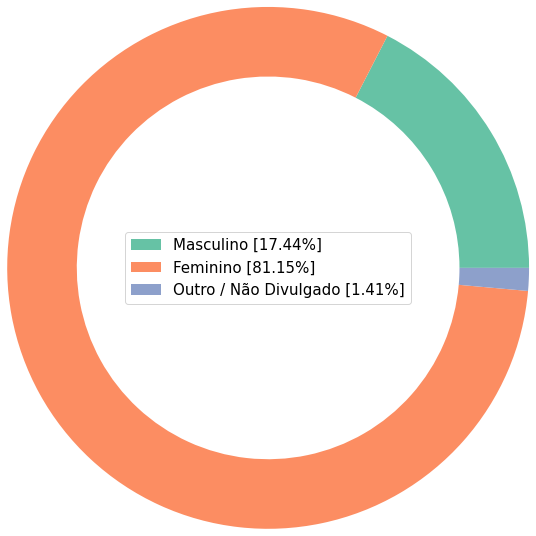

In [11]:
labels = []
for i in range(len(resultado.index)):
    labels.append(str(resultado.Sexo[i]) + ' [' + str(resultado['Porcentagem (%)'][i]) + '%' + ']')


cs = cm.Set2(np.arange(100))
plt.pie(resultado['Porcentagem (%)'], radius = 3, wedgeprops={'width':0.8}, colors = cs)
plt.legend(labels, fontsize = 15, loc = 'center')
plt.show()

## Análise de Compras Por Gênero

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária


In [12]:
resultado = pd.DataFrame({
              'Sexo':sorted(purchase_file['Sexo'].unique()),
              'Número de compras':purchase_file.groupby('Sexo').count()['Login'].values,
              'Preço médio por Venda (R$)':[round(i, 2) for i in purchase_file.groupby('Sexo').mean()['Valor'].values],
              'Valor total de Venda (R$)':[round(i,2) for i in purchase_file.groupby('Sexo').sum()['Valor'].values]})

resultado

,Sexo,Número de compras,Preço médio por Venda (R$),Valor total de Venda (R$)
0,Feminino,136,2.82,382.91
1,Masculino,633,2.95,1867.68
2,Outro / Não Divulgado,11,3.25,35.74


In [13]:
numero_compra_porc_fem = 100* resultado['Número de compras'][0]/resultado['Número de compras'].sum()
numero_compra_porc_masc = 100* resultado['Número de compras'][1]/resultado['Número de compras'].sum()
numero_compra_porc_outros = 100* resultado['Número de compras'][2]/resultado['Número de compras'].sum()

preco_medio_porc_fem = 100* resultado['Preço médio por Venda (R$)'][0]/resultado['Preço médio por Venda (R$)'].sum()
preco_medio_porc_masc = 100* resultado['Preço médio por Venda (R$)'][1]/resultado['Preço médio por Venda (R$)'].sum()
preco_medio_porc_outros = 100* resultado['Preço médio por Venda (R$)'][2]/resultado['Preço médio por Venda (R$)'].sum()

numero_compra_porc_outros = 100* resultado['Valor total de Venda (R$)'][0]/resultado['Valor total de Venda (R$)'].sum()
numero_compra_porc_outros = 100* resultado['Valor total de Venda (R$)'][1]/resultado['Valor total de Venda (R$)'].sum()
numero_compra_porc_outros = 100* resultado['Valor total de Venda (R$)'][2]/resultado['Valor total de Venda (R$)'].sum()

In [14]:
resultados_porc = pd.DataFrame({
            'Sexo':sorted(purchase_file['Sexo'].unique()),
            'Número de compras (%)':[numero_compra_porc_fem, numero_compra_porc_masc,numero_compra_porc_outros],
            'Preço médio por Venda (%)':[preco_medio_porc_fem, preco_medio_porc_masc, preco_medio_porc_outros],
            'Valor total de Venda (%)':[numero_compra_porc_fem, numero_compra_porc_masc, numero_compra_porc_outros]
            })   

resultados_porc

,Sexo,Número de compras (%),Preço médio por Venda (%),Valor total de Venda (%)
0,Feminino,17.435897,31.263858,17.435897
1,Masculino,81.153846,32.705100,81.153846
2,Outro / Não Divulgado,1.563204,36.031042,1.563204


In [15]:
str(round(1.2))

'1'

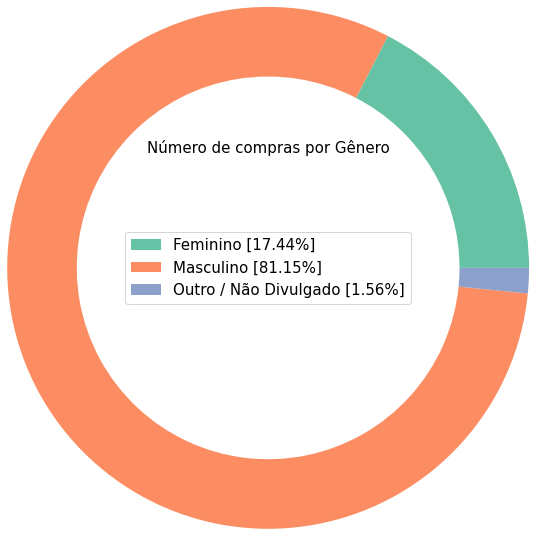

In [16]:
labels = []
for i in range(len(resultados_porc.index)):
    labels.append(str(resultados_porc.Sexo[i]) + ' [' + str(round(resultados_porc['Número de compras (%)'][i],2)) + '%' + ']')


plt.title('Número de compras por Gênero', fontsize = 15)
cs = cm.Set2(np.arange(100))
plt.pie(resultados_porc['Número de compras (%)'], radius = 3, wedgeprops={'width':0.8}, colors = cs)
plt.legend(labels, fontsize = 15, loc = 'center')
plt.show()

## Consumidores Mais Populares (Top 5)
Identificar os 5 principais compradores pelo valor total de compra e, em seguida, listar (em uma tabela):
* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares


In [17]:
purchase_file.columns

Index(['Login', 'Idade', 'Sexo', 'Item ID', 'Nome do Item', 'Valor'], dtype='object')

In [18]:
numero_compra = purchase_file.groupby(['Login']).count()['Valor']
preco_medio = purchase_file.groupby(['Login']).mean()['Valor']
valor_total = purchase_file.groupby(['Login']).sum()['Valor']


resultado = pd.DataFrame({'Número de compra':numero_compra,
                          'Preço médio por compra (R$)':preco_medio,
                          'Valor total de compra (R$)':valor_total})

resultado = resultado.head(5).sort_values('Valor total de compra (R$)', ascending = False)
resultado

,Número de compra,Preço médio por compra (R$),Valor total de compra (R$)
Login,,,
Aduephos78,3,2.233333,6.70
Aeduera68,3,1.933333,5.80
Adairialis76,1,2.460000,2.46
Aela49,1,2.460000,2.46
Aela59,1,1.270000,1.27


Text(0.5, 0, 'Valor total de compra (R$)')

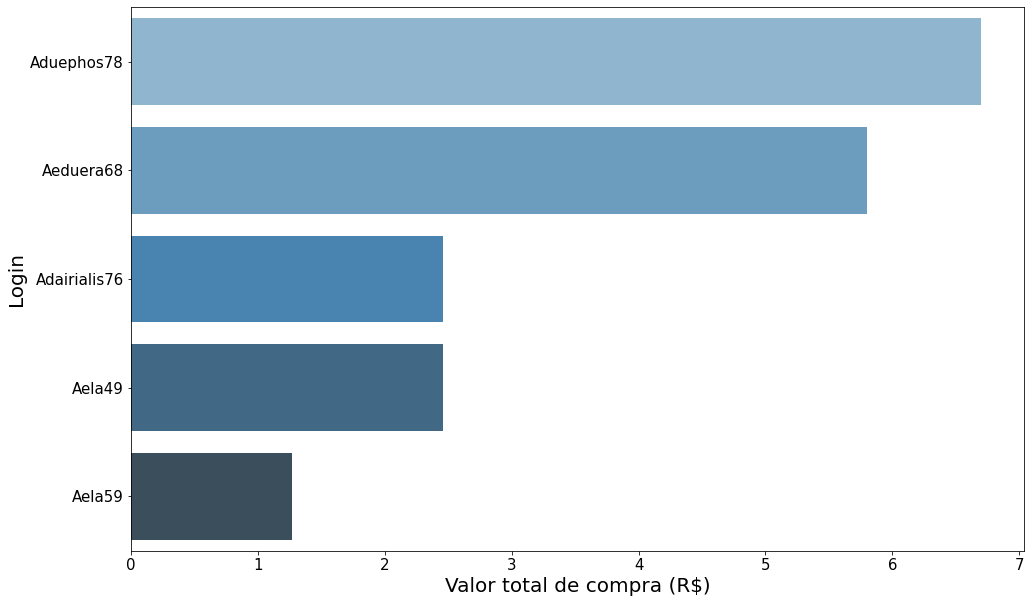

In [19]:
plt.figure(figsize=(16,10))
sns.barplot(y = resultado.index, x = resultado['Valor total de compra (R$)'], orient = 'h', palette = 'Blues_d')
plt.tick_params(axis = 'both', labelsize = 15)
plt.ylabel('Login',fontsize=20)
plt.xlabel('Valor total de compra (R$)',fontsize=20)

## Itens Mais Populares
Identificar os 5 itens mais populares por contagem de compras e, em seguida, listar (em uma tabela):
* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos


In [20]:
numero_compra = purchase_file.groupby('Nome do Item').count()['Valor']
total_compra = purchase_file.groupby('Nome do Item').sum()['Valor']
preco_medio = purchase_file.groupby('Nome do Item').mean()['Valor']

resultado = pd.DataFrame({'Número de Compras':numero_compra, 
                          'Preço Médio (R$)':preco_medio,
                          'Valor total de compra (R$)':total_compra})

resultado = resultado.sort_values('Número de Compras', ascending = False).head(5)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Final Critic'),
  Text(1, 0, 'Arcane Gem'),
  Text(2, 0, 'Betrayal, Whisper of Grieving Widows'),
  Text(3, 0, 'Stormcaller'),
  Text(4, 0, 'Woeful Adamantite Claymore')])

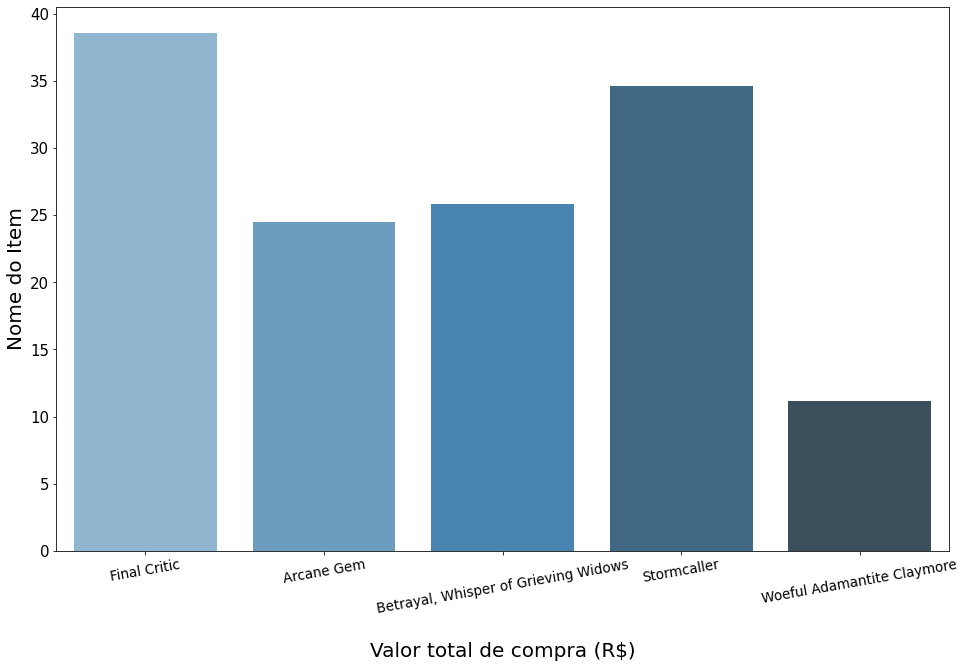

In [21]:
plt.figure(figsize=(16,10))
sns.barplot(x = resultado.index, y = resultado['Valor total de compra (R$)'], palette = 'Blues_d')
plt.tick_params(axis = 'both', labelsize = 15)
plt.ylabel('Nome do Item',fontsize = 20)
plt.xlabel('\nValor total de compra (R$)',fontsize=20)
plt.xticks(fontsize = 13.5, rotation=10)

## Itens Mais Lucrativos
Identificar os 5 itens mais lucrativos pelo valor total de compra e, em seguida, listar (em uma tabela):
* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra


In [22]:
numero_compra = purchase_file.groupby('Nome do Item').count()['Valor']
total_compra = purchase_file.groupby('Nome do Item').sum()['Valor']
preco = purchase_file.groupby('Nome do Item').mean()['Valor']

resultado = pd.DataFrame({'Número de Compras':numero_compra, 
                          'Preço Médio (R$)':preco,
                          'Valor total de compra (R$)':total_compra})

resultado = resultado.sort_values('Valor total de compra (R$)', ascending = False).head(5)

Text(0.5, 0, 'Valor total de compra (R$)')

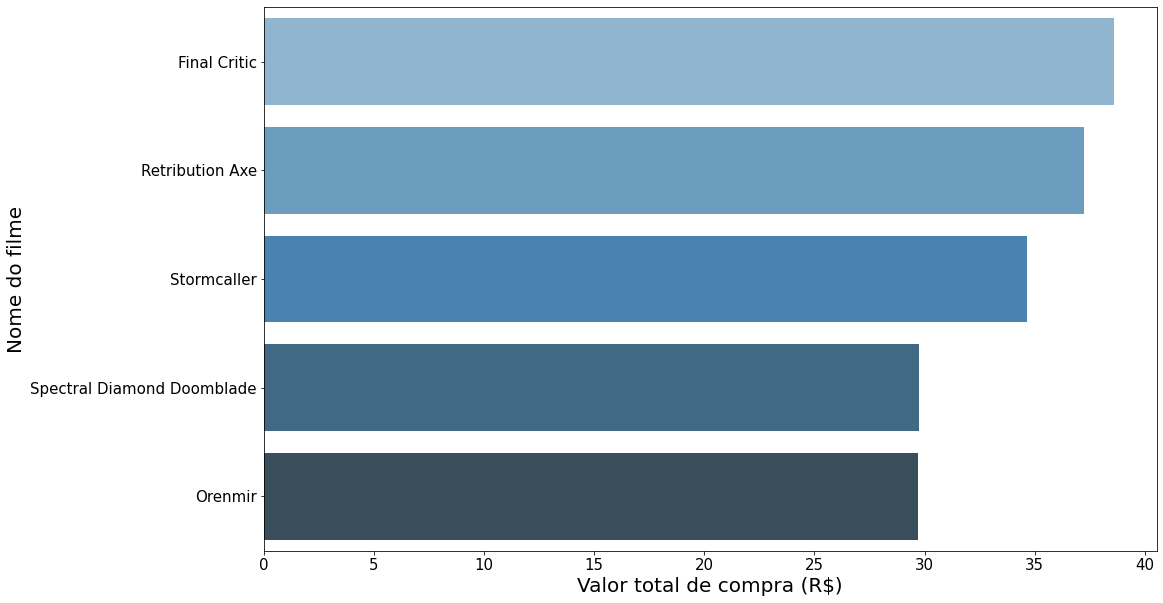

In [23]:
plt.figure(figsize=(16,10))
sns.barplot(y = resultado.index, x = resultado['Valor total de compra (R$)'], orient = 'h', palette = 'Blues_d')
plt.tick_params(axis = 'both', labelsize = 15)
plt.ylabel('Nome do filme',fontsize=20)
plt.xlabel('Valor total de compra (R$)',fontsize=20)